# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 71.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=876be45536bf28cf438a666809b19aaaef3dcd2654da5cb7eb99c2e0d79b4c46
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file

import json
kaggle_username = "kamalbatcha"
kaggle_key = "8ec2f4f98f174fc8ca6de85c07a56831"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": "kamalbatcha", "key":"8ec2f4f98f174fc8ca6de85c07a56831"}))
    

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

100% 189k/189k [00:00<00:00, 1.10MB/s]
100% 189k/189k [00:00<00:00, 1.10MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
drop_train_features=["casual","registered"]
train.drop(drop_train_features,axis=1,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [ ]:
predictor=TabularPredictor(label="count",problem_type="regression",eval_metric="rmse").fit(train_data=train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_154620/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_154620/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12597.98 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Not

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.963272      27.895110  555.408268                0.000699           0.171382            3       True         13
1   RandomForestMSE_BAG_L2  -53.214706      22.262777  427.483916                0.649346          50.006135            2       True         12
2          LightGBM_BAG_L2  -55.047629      22.402358  417.250329                0.788926          39.772548            2       True         11
3        LightGBMXT_BAG_L2  -60.472443      26.456139  465.458203                4.842707          87.980421            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061       0.036416    0.038682                0.036416           0.038682            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.037428    0.477210         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.66622633680268

### Create predictions from test dataset

<Axes: xlabel='model'>

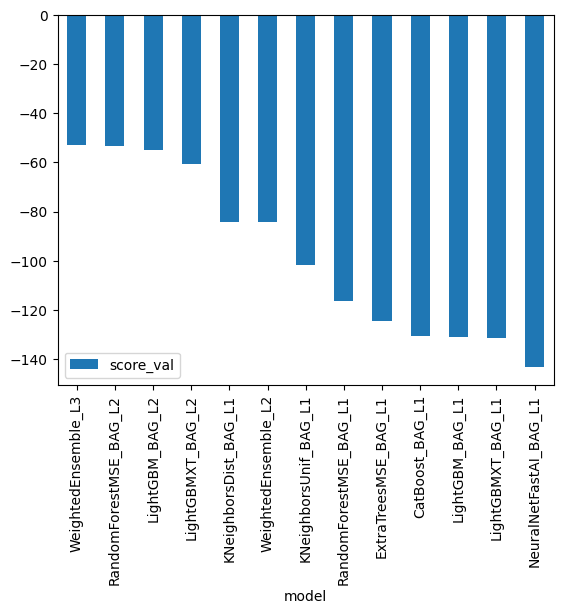

In [ ]:
predictor.leaderboard(silent=True).plot(kind="bar",x="model",y="score_val")

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
predictions = predictor.predict(test)
predictions = { 'count': predictions}
predictions = pd.DataFrame(data=predictions)
predictions.head()

,count
0,22.233025
1,42.338882
2,46.560833
3,49.080864
4,51.574436


In [ ]:
predictions[predictions['count']<0]=0


In [ ]:

submission["count"] = predictions
submission.to_csv("submission1.csv", index=False)

### Set predictions to submission dataframe, save, and submit

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission1.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 242kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission1.csv              2023-05-31 15:58:31  first raw submission               complete  1.79818      1.79818       
submission_new_hpo.csv       2023-05-31 11:01:42  new features with hyperparameters  complete  0.51347      0.51347       
submission_new_hpo.csv       2023-05-31 10:50:00  new features with hyperparameters  complete  0.48369      0.48369       
submission_new_hpo.csv       2023-05-31 10:25:13  new features with hyperparameters  complete  0.46670      0.46670       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [ ]:
train1=pd.read_csv("train.csv")
test1= pd.read_csv("test.csv")

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train1.loc[:, 'datetime'] = pd.to_datetime(train1.loc[:, 'datetime'])
test1.loc[:, 'datetime'] = pd.to_datetime(test1.loc[:, 'datetime'])

<ipython-input-23-06b3d5c834f8>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train1.loc[:, 'datetime'] = pd.to_datetime(train1.loc[:, 'datetime'])
<ipython-input-23-06b3d5c834f8>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test1.loc[:, 'datetime'] = pd.to_datetime(test1.loc[:, 'datetime'])


In [ ]:
train1['year'] =  pd.to_datetime(train1.loc[:, 'datetime']).dt.year
train1['month'] =  pd.to_datetime(train1.loc[:, 'datetime']).dt.month
train1['day'] =  pd.to_datetime(train1.loc[:, 'datetime']).dt.day
train1['hour']=  pd.to_datetime(train1.loc[:, 'datetime']).dt.hour
test1['year'] =  pd.to_datetime(test1.loc[:, 'datetime']).dt.year
test1['month'] =  pd.to_datetime(test1.loc[:, 'datetime']).dt.month
test1['day'] =  pd.to_datetime(test1.loc[:, 'datetime']).dt.day
test1['hour']=  pd.to_datetime(test1.loc[:, 'datetime']).dt.hour

In [ ]:
train1["season"]=train1["season"].astype("category")
train1["weather"]=train1["weather"].astype("category")
test1["season"]=test1["season"].astype("category")
test1["weather"]=test1["weather"].astype("category")

In [ ]:
drop_train_features=["casual","registered"]
train1.drop(drop_train_features,axis=1,inplace=True)

In [ ]:
# View are new feature
train1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>]], dtype=object)

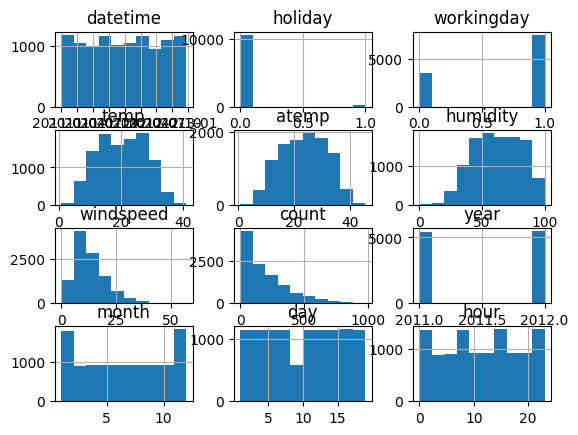

In [ ]:
train1.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features =TabularPredictor(label="count",problem_type="regression",eval_metric="rmse").fit(train_data=train1,time_limit=700,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_155934/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 700s
AutoGluon will save models to "AutogluonModels/ag-20230531_155934/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11070.88 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.234365      52.999324  666.333876                0.000964           0.283533            3       True         14
1          LightGBM_BAG_L2  -30.509101      49.152152  507.357821                0.814429          32.002798            2       True         11
2          CatBoost_BAG_L2  -30.813003      48.525666  551.036397                0.187943          75.681374            2       True         13
3        LightGBMXT_BAG_L2  -31.087658      51.113887  514.674006                2.776163          39.318984            2       True         10
4   RandomForestMSE_BAG_L2  -31.574558      49.219826  519.047186                0.882102          43.692164            2       True         12
5      WeightedEnsemble_L2  -32.188374      46.781202  424.406573         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.34599701170154,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.306

In [ ]:
predictions= predictor_new_features.predict(test1)
predictions = { 'count': predictions}
predictions = pd.DataFrame(data=predictions)
predictions.head()

,count
0,15.550998
1,11.041559
2,10.291946
3,9.086456
4,8.050445


In [ ]:
# Remember to set all negative values to zero
predictions[predictions['count']<0]=0

In [ ]:
submission_new_features=pd.read_csv("sampleSubmission.csv")

In [ ]:
# Same submitting predictions
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 247kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-31 16:14:18  new features                       complete  0.64953      0.64953       
submission1.csv              2023-05-31 15:58:31  first raw submission               complete  1.79818      1.79818       
submission_new_hpo.csv       2023-05-31 11:01:42  new features with hyperparameters  complete  0.51347      0.51347       
submission_new_hpo.csv       2023-05-31 10:50:00  new features with hyperparameters  complete  0.48369      0.48369       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
train2=pd.read_csv("train.csv")
test2= pd.read_csv("test.csv")

In [ ]:
train2.loc[:, 'datetime'] = pd.to_datetime(train2.loc[:, 'datetime'])
test2.loc[:, 'datetime'] = pd.to_datetime(test2.loc[:, 'datetime'])

<ipython-input-40-c29f22c2940a>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train2.loc[:, 'datetime'] = pd.to_datetime(train2.loc[:, 'datetime'])
<ipython-input-40-c29f22c2940a>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test2.loc[:, 'datetime'] = pd.to_datetime(test2.loc[:, 'datetime'])


In [ ]:
train2['year'] =  pd.to_datetime(train2.loc[:, 'datetime']).dt.year
train2['month'] =  pd.to_datetime(train2.loc[:, 'datetime']).dt.month
train2['day'] =  pd.to_datetime(train2.loc[:, 'datetime']).dt.day
train2['hour']=  pd.to_datetime(train2.loc[:, 'datetime']).dt.hour
test2['year'] =  pd.to_datetime(test2.loc[:, 'datetime']).dt.year
test2['month'] =  pd.to_datetime(test2.loc[:, 'datetime']).dt.month
test2['day'] =  pd.to_datetime(test2.loc[:, 'datetime']).dt.day
test2['hour']=  pd.to_datetime(test2.loc[:, 'datetime']).dt.hour

In [ ]:
train2["season"]=train2["season"].astype("category")
train2["weather"]=train2["weather"].astype("category")
test2["season"]=test2["season"].astype("category")
test2["weather"]=test2["weather"].astype("category")

In [ ]:
drop_train_features=["casual","registered","datetime"]
train2.drop(drop_train_features,axis=1,inplace=True)

In [ ]:
drop_test_features=["datetime"]
test2.drop(drop_test_features,axis=1,inplace=True)

In [ ]:
import autogluon.core as ag
hp_tune=True
rf_option={
   
   'n_estimators': [100,125,150],
   'max_depth': [5, 7, 10],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'max_features': ['auto', 'sqrt', 'log2']
}
gbm_options = {
    'num_boost_round':85,  
    'max_depth':5,
    
}
hyperparameters={
                 "GBM":gbm_options,"RF":rf_option,
}
num_trails=2
search_strategy = 'auto'

hyperparameter_tune_kwargs={
    "num_trails":num_trails,
    "searcher":search_strategy,
    "scheduler":"local",
}
predictor_new_hpo = TabularPredictor(label="count",problem_type="regression",eval_metric="rmse").fit(train_data=train2,time_limit=700,presets="best_quality",hyperparameters=hyperparameters,hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_161907/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 700s
AutoGluon will save models to "AutogluonModels/ag-20230531_161907/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10907.62 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -42.618497       1.566671  432.142157                0.001066           0.413235            3       True         13
1    LightGBM_BAG_L2/T5  -42.670897       1.305243  377.867378                0.215142          51.979343            2       True         12
2    LightGBM_BAG_L2/T2  -42.798307       1.350462  379.749578                0.260361          53.861543            2       True          9
3    LightGBM_BAG_L2/T1  -43.283393       1.248659  377.421451                0.158558          51.533415            2       True          8
4    LightGBM_BAG_L2/T3  -43.453089       1.289233  380.897774                0.199132          55.009738            2       True         10
5    LightGBM_BAG_L1/T5  -47.649167       0.201055   60.280115                0.201055      

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -55.68628896575726,
  'LightGBM_BAG_L1/T2': -49.50396234329078,
  'LightGBM_BAG_L1/T3': -56.61482019806347,
  'LightGBM_BAG_L1/T4': -139.09945348867413,
  'LightGBM_BAG_L1/T5': -47.64916678832549,
  'LightGBM_BAG_L1/T6': -96.47046827213732,
  'WeightedEnsemble_L2': -

In [ ]:
prediction_new_hpo = predictor_new_hpo.predict(test1)
prediction_new_hpo = { 'count': prediction_new_hpo}
prediction_new_hpo = pd.DataFrame(data=prediction_new_hpo)
prediction_new_hpo.head()

,count
0,12.849545
1,5.752746
2,5.487647
3,5.220176
4,5.220176


In [ ]:
# Remember to set all negative values to zero

prediction_new_hpo[prediction_new_hpo['count']<0]=0


In [ ]:
submission_new_hpo=pd.read_csv("sampleSubmission.csv")

In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = prediction_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)
submission_new_hpo


,datetime,count
0,2011-01-20 00:00:00,12.849545
1,2011-01-20 01:00:00,5.752746
2,2011-01-20 02:00:00,5.487647
3,2011-01-20 03:00:00,5.220176
4,2011-01-20 04:00:00,5.220176
...,...,...
6488,2012-12-31 19:00:00,306.804016
6489,2012-12-31 20:00:00,211.768280
6490,2012-12-31 21:00:00,165.396179
6491,2012-12-31 22:00:00,128.934784


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 209kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-31 16:30:36  new features with hyperparameters  complete  0.46423      0.46423       
submission_new_features.csv  2023-05-31 16:14:18  new features                       complete  0.64953      0.64953       
submission1.csv              2023-05-31 15:58:31  first raw submission               complete  1.79818      1.79818       
submission_new_hpo.csv       2023-05-31 11:01:42  new features with hyperparameters  complete  0.51347      0.51347       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

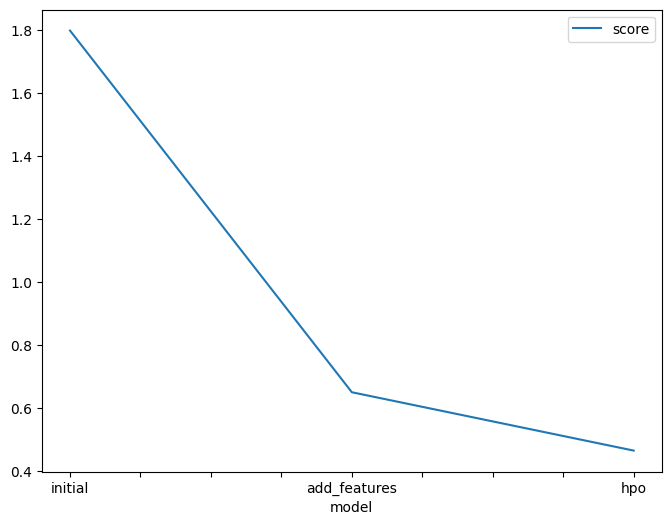

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.79818, 0.64953 ,0.46423]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

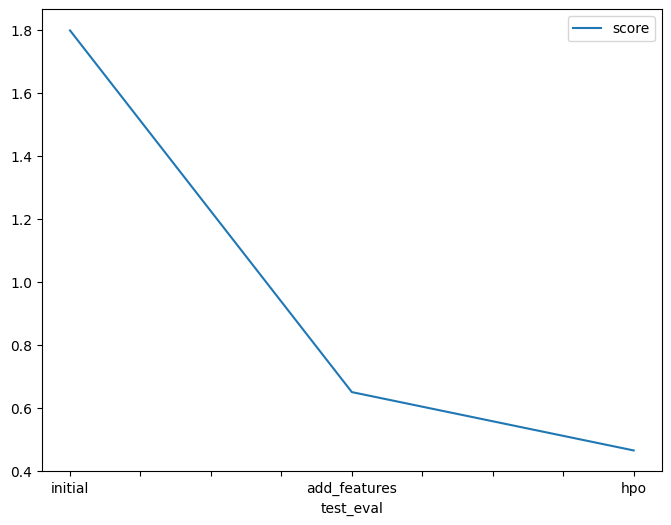

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79818,0.64953,0.46423]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
hp=pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['default_vals', 'default_vals', 'n_estimators: 100,125,150'],
    "hpo2": ['default_vals', 'default_vals', 'num_boost_round:85'],
    "hpo3": ['default_vals', 'default_vals', 'max_depth:5, 7, 10']

})

In [ ]:
hp.head()

,model,hpo1,hpo2,hpo3
0,initial,default_vals,default_vals,default_vals
1,add_features,default_vals,default_vals,default_vals
2,hpo,"n_estimators: 100,125,150",num_boost_round:85,"max_depth:5, 7, 10"
